Spot the Fire V3.0 
This file uses two datasets and runs multiple machine learning algorithms to check for their accuracy on that data. The datasets used are 
1. MODIS_C6_Canada_7d.csv
2. Fire Dataset (image)

The aim of this project is to compare the machine learning algorithms and find the one with the best accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

In [ ]:
data_train = pd.read_csv('/content/MODIS_C6_Canada_7d.csv', skipinitialspace=True)
data_train.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,40.639,-89.637,313.9,1.0,1.0,2020-09-23,400,T,88,6.0NRT,285.1,14.6,N
1,52.205,-104.056,306.7,1.8,1.3,2020-09-23,405,T,69,6.0NRT,274.5,30.8,N
2,40.049,-122.907,324.5,2.0,1.4,2020-09-23,540,T,100,6.0NRT,280.7,71.2,N
3,40.044,-122.931,329.8,2.0,1.4,2020-09-23,540,T,100,6.0NRT,281.0,89.6,N
4,40.051,-122.914,336.7,2.0,1.4,2020-09-23,540,T,100,6.0NRT,281.8,115.7,N


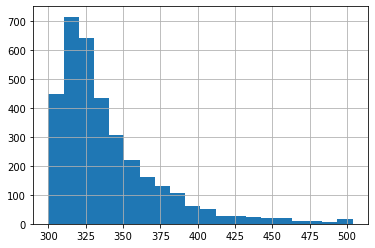

In [ ]:
data_train['brightness'].hist(bins=20)

In [ ]:
data_train['brightness'].quantile([0, 0.25, .75, .9])

0.00    300.00
0.25    316.20
0.75    352.50
0.90    385.06
Name: brightness, dtype: float64

In [ ]:
data_train['longitude'].quantile([0, 0.25, .75, .9])

0.00   -127.4960
0.25   -123.2600
0.75   -106.3480
0.90   -105.6962
Name: longitude, dtype: float64

In [ ]:
data_train['latitude'].quantile([0, 0.25, .75, .9])

0.00    40.000
0.25    40.322
0.75    41.135
0.90    42.837
Name: latitude, dtype: float64

In [ ]:
def bright_categorize(brightness):
     
    if brightness < 350.0:
        return 'low'
    elif 350.0 <= brightness <= 400.0:
        return 'High'
    else:
        return 'Extreme'

data_train['brightness'] = data_train['brightness'].fillna(data_train['brightness'].mean())
data_train['longitude'] = data_train['longitude'].fillna(data_train['longitude'].mean())
data_train['latitude'] = data_train['latitude'].fillna(data_train['latitude'].mean())
data_train['brightness_temperature'] = data_train['brightness'].apply(bright_categorize)

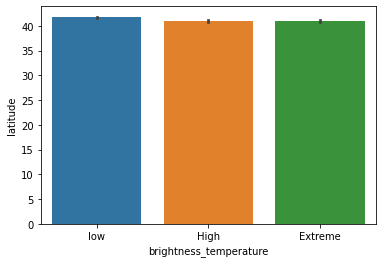

In [ ]:
sns.barplot(x='brightness_temperature', y='latitude', data=data_train)

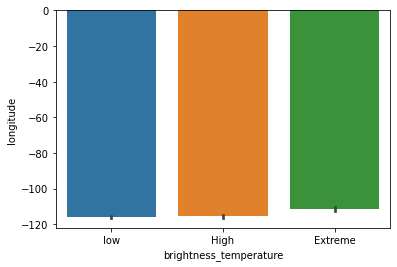

In [ ]:
sns.barplot(x='brightness_temperature', y='longitude', data=data_train)

In [ ]:
def area_categorize(longitude, latitude):
    
    if -110.0< longitude < -80.0 or latitude < 45.0:
        return 'Western Canada'
    elif -120.0 < longitude < -112.8 or latitude > 45.0:
        return 'Northern Canada'
    elif longitude > 112.9 or 42 < latitude < 48:
        return 'Southern Canada'
    else:
        return 'Eastern Canada'

df = pd.DataFrame(data_train)
df_train = pd.DataFrame(df, columns = ['brightness_temperature', 'daynight', 'brightness']) 
df_train['Area of Fire'] = df.apply(lambda x: area_categorize(x['longitude'], x['latitude']), axis=1)
df_train.head()

,brightness_temperature,daynight,brightness,Area of Fire
0,low,N,313.9,Western Canada
1,low,N,306.7,Western Canada
2,low,N,324.5,Western Canada
3,low,N,329.8,Western Canada
4,low,N,336.7,Western Canada


Brightness in area

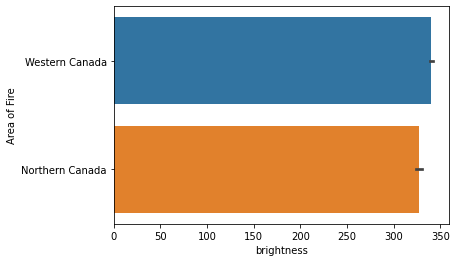

In [ ]:
sns.barplot(x='brightness', y='Area of Fire', data=df_train)

In [ ]:
import folium
m3 = folium.Map(location=[40.661, -106.777], tiles='cartodbdark_matter', zoom_start=4)

for i in range(0,3000):
    df.loc[i, 'brightness']
    def color_producer(val):
        if val < 325 :
            return 'red'
        else:
            return 'orange'
for i in range(0,3000):
	folium.Circle(location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']], radius=120*df.iloc[i]['brightness'], color=color_producer(df.iloc[i]['brightness'])).add_to(m3)
m3

area with most fire

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


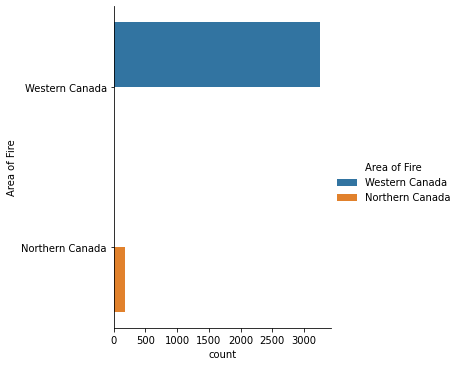

In [ ]:
sns.factorplot(y='Area of Fire', kind='count', hue='Area of Fire', data=df_train)

day and night fires

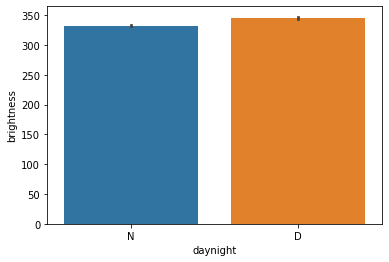

In [ ]:
sns.barplot(x='daynight', y='brightness', data=df_train)

In [ ]:
df_train

,brightness_temperature,daynight,brightness,Area of Fire
0,low,N,313.9,Western Canada
1,low,N,306.7,Western Canada
2,low,N,324.5,Western Canada
3,low,N,329.8,Western Canada
4,low,N,336.7,Western Canada
...,...,...,...,...
3428,low,D,315.0,Western Canada
3429,low,D,333.4,Western Canada
3430,High,D,358.7,Western Canada
3431,low,D,315.1,Western Canada


In [ ]:
def preproccesing_data(df):
    df['brightness_temperature'] = df['brightness_temperature'].map({'low':0, 'High':1, 'Extreme':2})
    df['Area of Fire'] = df['Area of Fire'].map({'Western Canada':0, 'Southern Canada':1, 'Northern Canada':2, 'Eastern Canada':3})
    df['daynight'] = df['daynight'].replace(['D'], 0)
    df['daynight'] = df['daynight'].replace(['N'], 1)
    return df


train_final = preproccesing_data(df_train)
train_final

,brightness_temperature,daynight,brightness,Area of Fire
0,0,1,313.9,0
1,0,1,306.7,0
2,0,1,324.5,0
3,0,1,329.8,0
4,0,1,336.7,0
...,...,...,...,...
3428,0,0,315.0,0
3429,0,0,333.4,0
3430,1,0,358.7,0
3431,0,0,315.1,0


Predicition

In [ ]:
X_train = train_final.drop("Area of Fire", axis=1).fillna(0)
Y_train = train_final["Area of Fire"]
X_test  = train_final.copy()
X_train.shape, Y_train.shape, X_test.shape

((3433, 3), (3433,), (3433, 4))

KNeighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

95.28

SVC

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

94.93

Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.95

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

94.93

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

94.93

Image Dataset

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')


import os
from keras.applications import xception
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import cv2
from scipy.stats import uniform

from tqdm import tqdm
from glob import glob


from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Masking
from keras.utils import np_utils, to_categorical



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_folder = '/content/drive/My Drive/fire_dataset'
data_folder = '/content/drive/My Drive/fire_dataset'
train_data_folder = '/content/drive/My Drive/fire_dataset/fire_images'
test_date_folder  = '/content/drive/My Drive/fire_dataset/non_fire_images'

categories = ['fire_images', 'non_fire_images']
len_categories = len(categories)

In [ ]:
image_count = {}
train_data = []

for i , category in tqdm(enumerate(categories)):
    class_folder = os.path.join(data_folder, category)
    label = category
    image_count[category] = []
    
    for path in os.listdir(os.path.join(class_folder)):
        image_count[category].append(category)
        train_data.append(['{}/{}'.format(category, path), i, category])


2it [00:00, 101.01it/s]


In [ ]:
#show image count
for key, value in image_count.items():
    print('{0} -> {1}'.format(key, len(value)))

fire_images -> 755
non_fire_images -> 244


In [ ]:
#create a dataframe
df = pd.DataFrame(train_data, columns=['file', 'id', 'label'])
df.shape
df.head()

(999, 3)

,file,id,label
0,fire_images/fire.606.png,0,fire_images
1,fire_images/fire.712.png,0,fire_images
2,fire_images/fire.26.png,0,fire_images
3,fire_images/fire.250.png,0,fire_images
4,fire_images/fire.626.png,0,fire_images


In [ ]:
#masking function
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_hsv = np.array([0,0,250])
    upper_hsv = np.array([250,255,255])
    
    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

#image segmentation function
def segment_image(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255

#sharpen the image
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

# function to get an image
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_folder, filepath), target_size=size)
    #convert image to array
    img = image.img_to_array(img)
    return img

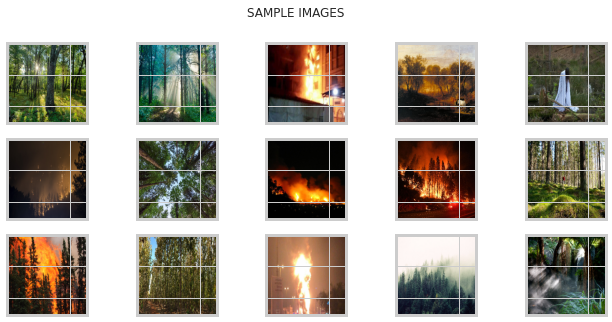

In [ ]:
nb_rows = 3
nb_cols = 5
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 5));
plt.suptitle('SAMPLE IMAGES');
for i in range(0, nb_rows):
    for j in range(0, nb_cols):
        axs[i, j].xaxis.set_ticklabels([]);
        axs[i, j].yaxis.set_ticklabels([]);
        axs[i, j].imshow((read_img(df['file'][np.random.randint(1000)], (255,255)))/255.);
plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


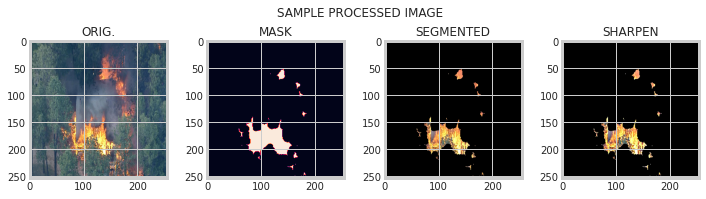

In [ ]:
#get an image
img = read_img(df['file'][102],(255,255))
#mask
image_mask = create_mask_for_plant(img)
#segmentation
image_segmented = segment_image(img)
#sharpen the image
image_sharpen = sharpen_image(image_segmented)

fig, ax = plt.subplots(1, 4, figsize=(10, 5));
plt.suptitle('SAMPLE PROCESSED IMAGE', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIG.', fontsize=12)
ax[1].set_title('MASK', fontsize=12)
ax[2].set_title('SEGMENTED', fontsize=12)
ax[3].set_title('SHARPEN', fontsize=12)


ax[0].imshow(img/255);
ax[1].imshow(image_mask);
ax[2].imshow(image_segmented);
ax[3].imshow(image_sharpen);

In [ ]:
INPUT_SIZE=255

##preprocess the input
X_train = np.zeros((len(df), INPUT_SIZE, INPUT_SIZE, df.shape[1]), dtype='float')
for i, file in tqdm(enumerate(df['file'])):
    #read image
    img = read_img(file,(INPUT_SIZE,INPUT_SIZE))
    #masking and segmentation
    image_segmented = segment_image(img)
    #sharpen
    image_sharpen = sharpen_image(image_segmented)
    x = xception.preprocess_input(np.expand_dims(image_sharpen.copy(), axis=0))
    X_train[i] = x

999it [04:42,  3.54it/s]


In [ ]:
print('Train Image Shape: ', X_train.shape)
print('Train Image Size: ', X_train.size)

Train Image Shape:  (999, 255, 255, 3)
Train Image Size:  194879925


In [ ]:
y = df['id']
train_x, train_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=101)

In [ ]:
print('FIRE IMAGES ON TRAINING DATA: ',y_train[y_train==0].shape[0])
print('NON-FIRE IMAGES ON TRAINING DATA: ',y_train[y_train==1].shape[0])

FIRE IMAGES ON TRAINING DATA:  610
NON-FIRE IMAGES ON TRAINING DATA:  189


In [ ]:
##get the features
xception_bf = xception.Xception(weights='imagenet', include_top=False, pooling='avg')
bf_train_x = xception_bf.predict(train_x, batch_size=32, verbose=1)
bf_train_val = xception_bf.predict(train_val, batch_size=32, verbose=1)

7/7 [==============================] - 43s 6s/step


In [ ]:
#print shape of feature and size
print('Train Shape: ', bf_train_x.shape)
print('Train Size: ', bf_train_x.size)

print('Validation Shape: ', bf_train_val.shape)
print('Validation Size: ', bf_train_val.size)

Train Shape:  (799, 2048)
Train Size:  1636352
Validation Shape:  (200, 2048)
Validation Size:  409600


In [ ]:
#keras Sequential model
model = Sequential()
model.add(Dense(units = 256 , activation = 'relu', input_dim=bf_train_x.shape[1]))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 541,057
Trainable params: 541,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model @ 100 epochs
history = model.fit(bf_train_x, y_train, epochs=100, batch_size=32);

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5397 - accuracy: 0.7635
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7635
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4054 - accuracy: 0.8173
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3641 - accuracy: 0.8498
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8636
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8673
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.8548
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8811
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.8761
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.8861
Epoch 11/

Text(0.5, 1.0, 'TRAINING LOSS')

Text(0.5, 1.0, 'TRAINING ACCURACY')

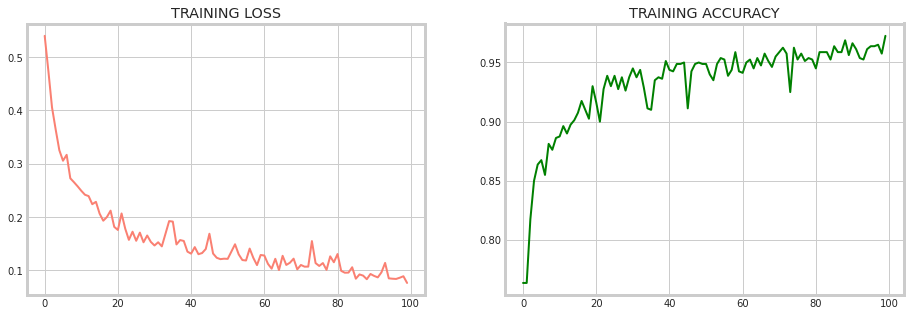

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_title('TRAINING LOSS');
ax[1].set_title('TRAINING ACCURACY');


ax[0].plot(history.history['loss'], color= 'salmon',lw=2);
ax[1].plot(history.history['accuracy'], color= 'green',lw=2)

In [ ]:
#predict the validation data
predictions = model.predict_classes(bf_train_val)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       145
           1       0.82      0.85      0.84        55

    accuracy                           0.91       200
   macro avg       0.88      0.89      0.89       200
weighted avg       0.91      0.91      0.91       200



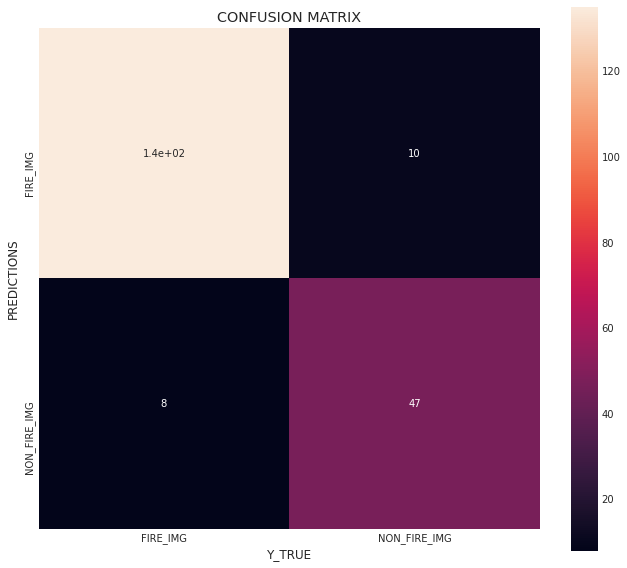

In [ ]:
confusion_mat = confusion_matrix(y_val, predictions)

plt.figure(figsize=(10,10))
sns.heatmap(confusion_mat, square=True, annot=True,
            yticklabels=['FIRE_IMG', 'NON_FIRE_IMG'],
            xticklabels=['FIRE_IMG', 'NON_FIRE_IMG']);
plt.title('CONFUSION MATRIX');
plt.xlabel('Y_TRUE');
plt.ylabel("PREDICTIONS");